# Coplanar Double Pendulum Hamiltonian and Canonical Equations

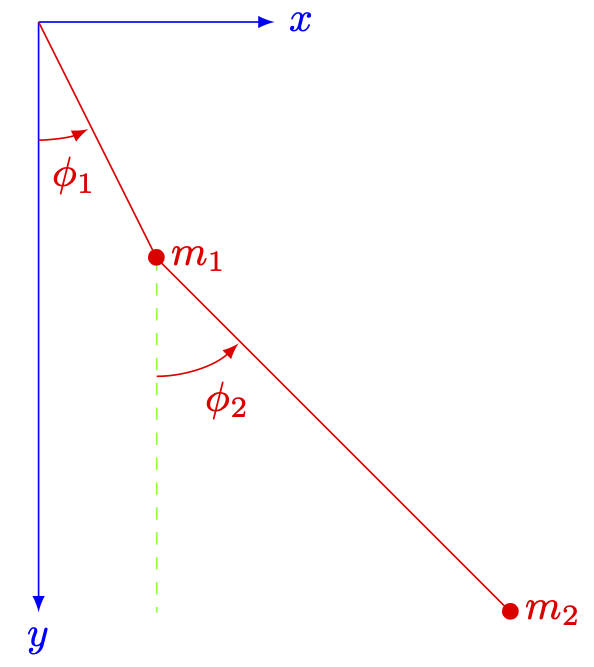

##Preamble

In [1]:
import sympy as sp

Symbolic variables

In [2]:
t,l1,l2,m1,m2,g=sp.symbols('t,l1,l2,m1,m2,g',positive=True)

Generalized coordinates

In [3]:
phi1,phi2=sp.Function('phi1')(t),sp.Function('phi2')(t)

Cartesian Coordinates

In [4]:
x1=l1*sp.sin(phi1)
x2=l1*sp.sin(phi1)+l2*sp.sin(phi2)
y1=l1*sp.cos(phi1)
y2=l1*sp.cos(phi1)+l2*sp.cos(phi2)

Cartesian velocities

In [5]:
dot_x1=x1.diff(t)
dot_y1=y1.diff(t)
dot_x2=x2.diff(t)
dot_y2=y2.diff(t)

## Kinetic Energy $T$

In [6]:
T=sp.simplify(sp.Rational(1,2)*m1*(dot_x1**2+ dot_y1**2)+sp.Rational(1,2)*m2*(dot_x2**2+ dot_y2**2))
T

l1**2*m1*Derivative(phi1(t), t)**2/2 + m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

## Potential Energy $U$ (notice that $y$ increases downwards)

In [7]:
U=(-m1*g*y1-m2*g*y2).simplify()
U

-g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t)))

## Lagrangian $L=T-U$

In [8]:
Lag=(T-U).simplify()
Lag

g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t))) + l1**2*m1*Derivative(phi1(t), t)**2/2 + m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

## Conjugate Momenta

In [9]:
mom_1=sp.simplify(Lag.diff(phi1.diff(t))).expand()
mom_2=sp.simplify(Lag.diff(phi2.diff(t))).expand()

In [10]:
mom_1

l1**2*m1*Derivative(phi1(t), t) + l1**2*m2*Derivative(phi1(t), t) + l1*l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi2(t), t)

In [11]:
mom_2

l1*l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t) + l2**2*m2*Derivative(phi2(t), t)

## Solve velocities as functions of momenta

Definition of the conjugate momenta as functions of time

In [12]:
p1,p2=sp.Function('p1')(t),sp.Function('p2')(t)

The function **solve** finds the solution to the system of equations $mom_i=p_i$ for the variables $\dot{\phi}_i$, and its output is a dictionary

In [13]:
sols=sp.solve([sp.Eq(mom_1,p1),sp.Eq(mom_2,p2)],[phi1.diff(t),phi2.diff(t)])

$\dot{\phi}_1$

In [14]:
sols[phi1.diff(t)]

-l1*p2(t)*cos(phi1(t) - phi2(t))/(l1**2*l2*m1 - l1**2*l2*m2*cos(phi1(t) - phi2(t))**2 + l1**2*l2*m2) + l2*p1(t)/(l1**2*l2*m1 - l1**2*l2*m2*cos(phi1(t) - phi2(t))**2 + l1**2*l2*m2)

$\dot{\phi}_2$

In [15]:
sols[phi2.diff(t)]

l1*m1*p2(t)/(l1*l2**2*m1*m2 - l1*l2**2*m2**2*cos(phi1(t) - phi2(t))**2 + l1*l2**2*m2**2) + l1*m2*p2(t)/(l1*l2**2*m1*m2 - l1*l2**2*m2**2*cos(phi1(t) - phi2(t))**2 + l1*l2**2*m2**2) - l2*m2*p1(t)*cos(phi1(t) - phi2(t))/(l1*l2**2*m1*m2 - l1*l2**2*m2**2*cos(phi1(t) - phi2(t))**2 + l1*l2**2*m2**2)

Hamiltonian: $H(\phi_i,p_i)=p_i\dot{\phi}_i-L$

Energy as a function of $\phi_i$ and $\dot{\phi}_i$

In [16]:
E=mom_1*phi1.diff(t)+mom_2*phi2.diff(t)-Lag
E

-g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t))) - l1**2*m1*Derivative(phi1(t), t)**2/2 - m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2 + (l1*l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t) + l2**2*m2*Derivative(phi2(t), t))*Derivative(phi2(t), t) + (l1**2*m1*Derivative(phi1(t), t) + l1**2*m2*Derivative(phi1(t), t) + l1*l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi2(t), t))*Derivative(phi1(t), t)

Legendre transformation: Hamiltonian as a function of $\phi_i$ and $p_i$

In [17]:
H=sp.simplify(E.subs([(phi1.diff(t),sols[phi1.diff(t)]),(phi2.diff(t),sols[phi2.diff(t)])]))
H

(-g*l1**3*l2**2*m1**2*m2*cos(phi1(t)) + g*l1**3*l2**2*m1*m2**2*cos(phi1(t) - phi2(t))**2*cos(phi1(t)) - 2*g*l1**3*l2**2*m1*m2**2*cos(phi1(t)) + g*l1**3*l2**2*m2**3*cos(phi1(t) - phi2(t))**2*cos(phi1(t)) - g*l1**3*l2**2*m2**3*cos(phi1(t)) - g*l1**2*l2**3*m1*m2**2*cos(phi2(t)) + g*l1**2*l2**3*m2**3*cos(phi1(t) - phi2(t))**2*cos(phi2(t)) - g*l1**2*l2**3*m2**3*cos(phi2(t)) + l1**2*m1*p2(t)**2/2 + l1**2*m2*p2(t)**2/2 - l1*l2*m2*p1(t)*p2(t)*cos(phi1(t) - phi2(t)) + l2**2*m2*p1(t)**2/2)/(l1**2*l2**2*m2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

## Canonical Equations: $\dot{q}_i=\frac{\partial H}{\partial p_i}$, $\dot{p}_i=-\frac{\partial H}{\partial q_i}$

$\dot{\phi}_1$

In [18]:
dot_phi1=(H.diff(p1)).simplify()
dot_phi1

(-l1*p2(t)*cos(phi1(t) - phi2(t)) + l2*p1(t))/(l1**2*l2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

$\dot{\phi}_2$

In [19]:
dot_phi2=(H.diff(p2)).simplify()
dot_phi2

(l1*m1*p2(t) + l1*m2*p2(t) - l2*m2*p1(t)*cos(phi1(t) - phi2(t)))/(l1*l2**2*m2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

$\dot{p}_1$

In [20]:
dot_p1=-(H.diff(phi1)).simplify()
dot_p1

-(g*l1**3*l2**2*m1**3*sin(phi1(t)) - 2*g*l1**3*l2**2*m1**2*m2*sin(phi1(t))*cos(phi1(t) - phi2(t))**2 + 3*g*l1**3*l2**2*m1**2*m2*sin(phi1(t)) + g*l1**3*l2**2*m1*m2**2*sin(phi1(t))*cos(phi1(t) - phi2(t))**4 - 4*g*l1**3*l2**2*m1*m2**2*sin(phi1(t))*cos(phi1(t) - phi2(t))**2 + 3*g*l1**3*l2**2*m1*m2**2*sin(phi1(t)) + g*l1**3*l2**2*m2**3*sin(phi1(t))*cos(phi1(t) - phi2(t))**4 - 2*g*l1**3*l2**2*m2**3*sin(phi1(t))*cos(phi1(t) - phi2(t))**2 + g*l1**3*l2**2*m2**3*sin(phi1(t)) - l1**2*m1*p2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 - l1**2*m2*p2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 + l1*l2*m1*p1(t)*p2(t)*sin(phi1(t) - phi2(t)) + l1*l2*m2*p1(t)*p2(t)*sin(phi1(t) - phi2(t))*cos(phi1(t) - phi2(t))**2 + l1*l2*m2*p1(t)*p2(t)*sin(phi1(t) - phi2(t)) - l2**2*m2*p1(t)**2*sin(2*phi1(t) - 2*phi2(t))/2)/(l1**2*l2**2*(m1**2 - 2*m1*m2*cos(phi1(t) - phi2(t))**2 + 2*m1*m2 + m2**2*cos(phi1(t) - phi2(t))**4 - 2*m2**2*cos(phi1(t) - phi2(t))**2 + m2**2))

$\dot{p}_2$

In [21]:
dot_p2=-(H.diff(phi2)).simplify()
dot_p2

-(g*l1**2*l2**3*m1**2*m2*sin(phi2(t)) - 2*g*l1**2*l2**3*m1*m2**2*sin(phi2(t))*cos(phi1(t) - phi2(t))**2 + 2*g*l1**2*l2**3*m1*m2**2*sin(phi2(t)) + g*l1**2*l2**3*m2**3*sin(phi2(t))*cos(phi1(t) - phi2(t))**4 - 2*g*l1**2*l2**3*m2**3*sin(phi2(t))*cos(phi1(t) - phi2(t))**2 + g*l1**2*l2**3*m2**3*sin(phi2(t)) + l1**2*m1*p2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 + l1**2*m2*p2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 - l1*l2*m1*p1(t)*p2(t)*sin(phi1(t) - phi2(t)) - l1*l2*m2*p1(t)*p2(t)*sin(phi1(t) - phi2(t))*cos(phi1(t) - phi2(t))**2 - l1*l2*m2*p1(t)*p2(t)*sin(phi1(t) - phi2(t)) + l2**2*m2*p1(t)**2*sin(2*phi1(t) - 2*phi2(t))/2)/(l1**2*l2**2*(m1**2 - 2*m1*m2*cos(phi1(t) - phi2(t))**2 + 2*m1*m2 + m2**2*cos(phi1(t) - phi2(t))**4 - 2*m2**2*cos(phi1(t) - phi2(t))**2 + m2**2))

# Convert the symbolic canonical equations into numerical ones

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
num_dot_phi1=sp.lambdify([t,l1,l2,m1,m2,phi1,phi2,p1,p2],dot_phi1)
num_dot_phi2=sp.lambdify([t,l1,l2,m1,m2,phi1,phi2,p1,p2],dot_phi2)
num_dot_p1=sp.lambdify([t,l1,l2,m1,m2,g,phi1,phi2,p1,p2],dot_p1)
num_dot_p2=sp.lambdify([t,l1,l2,m1,m2,g,phi1,phi2,p1,p2],dot_p2)

Physical parameters

In [24]:
l1_num= 0.5  #(m)
l2_num= 1.0  #(m)
g_num = 9.8 #(m/s^2)
m1_num= 2.0  #(kg)
m2_num= 1.0  #(kg)

Auxiliary function for the integration of the system of first order differential equations

In [25]:
def derivatives(S,t):
  phi1_num,phi2_num,p1_num,p2_num=S
  dphi1dt=num_dot_phi1(t,l1_num,l2_num,m1_num,m2_num,phi1_num,phi2_num,p1_num,p2_num)
  dphi2dt=num_dot_phi2(t,l1_num,l2_num,m1_num,m2_num,phi1_num,phi2_num,p1_num,p2_num)
  dp1dt=num_dot_p1(t,l1_num,l2_num,m1_num,m2_num,g_num,phi1_num,phi2_num,p1_num,p2_num)
  dp2dt=num_dot_p2(t,l1_num,l2_num,m1_num,m2_num,g_num,phi1_num,phi2_num,p1_num,p2_num)
  return np.array([dphi1dt,dphi2dt,dp1dt,dp2dt])

## Numerical solution to the canonical equations

In [26]:
from scipy.integrate import odeint

Time frame

In [27]:
t0,tmax,dt=0.0,30.0,0.01 # Initial time, final time, time step (s)
time=np.arange(t0,tmax+dt,dt)

We generate two solutions that differ only by a small amount in one initial condition

In [28]:
answer1= odeint(derivatives,[3*np.pi/7,3*np.pi/4,0.2,0.4],time)

In [30]:
answer2= odeint(derivatives,[3*np.pi/7,3*np.pi/4,0.201,0.4],time)

The solutions differ significatively 5 seconds after the initial time

Text(0.5, 1.0, 'Double pendulum')

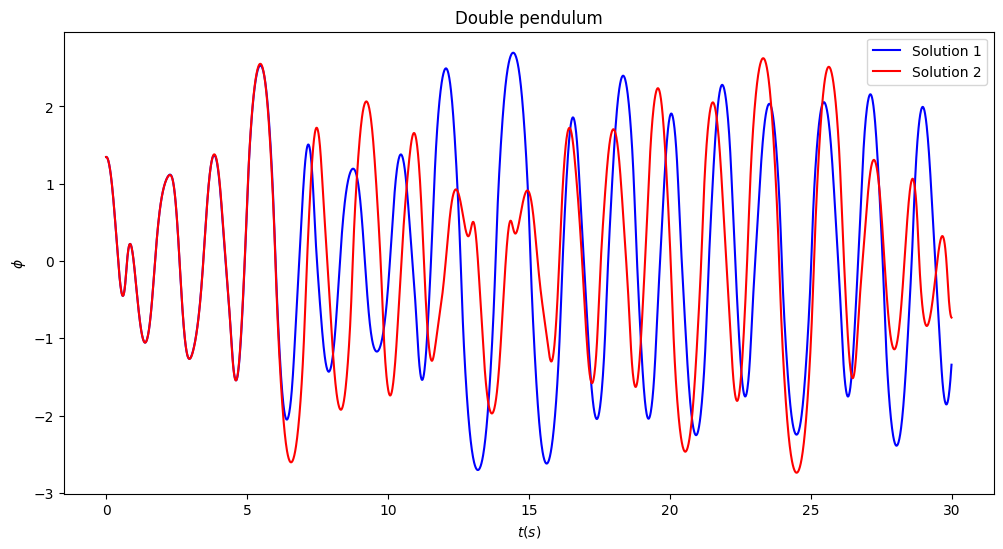

In [34]:
fig1,ax1=plt.subplots(figsize=(12,6))
ax1.plot(time,answer1[:,0],'b',label=f'Solution 1')
ax1.plot(time,answer2[:,0],'r',label=f'Solution 2')
ax1.set_xlabel(r'$t (s)$')
ax1.set_ylabel(r'$\phi$')
ax1.legend()
plt.title('Double pendulum')

Text(0.5, 1.0, 'Double pendulum')

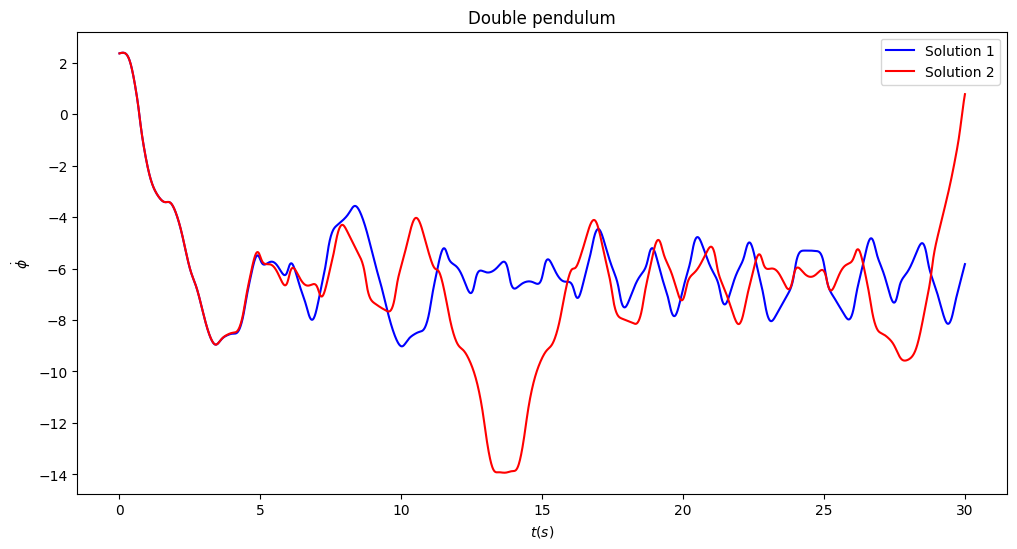

In [37]:
fig2,ax2=plt.subplots(figsize=(12,6))
ax2.plot(time,answer1[:,1],'b',label=f'Solution 1')
ax2.plot(time,answer2[:,1],'r',label=f'Solution 2')
ax2.set_xlabel(r'$t (s)$')
ax2.set_ylabel(r'$\dot{\phi}$')
ax2.legend()
plt.title('Double pendulum')

# Chaotic Behavior

Numerical solution for the angles of the two simulations

In [38]:
phi1_data1,phi2_data1=answer1[:,0],answer1[:,1]
phi1_data2,phi2_data2=answer2[:,0],answer2[:,1]

Conversion to cartesian coordinates

In [39]:
x1_data1=l1_num*np.sin(phi1_data1)
y1_data1=-l1_num*np.cos(phi1_data1)
x2_data1=x1_data1+l2_num*np.sin(phi2_data1)
y2_data1=y1_data1-l2_num*np.cos(phi2_data1)

x1_data2=l1_num*np.sin(phi1_data2)
y1_data2=-l1_num*np.cos(phi1_data2)
x2_data2=x1_data2+l2_num*np.sin(phi2_data2)
y2_data2=y1_data2-l2_num*np.cos(phi2_data2)

## Animation

In [40]:
from matplotlib.patches import Circle
import subprocess
from IPython.display import Image

In [41]:
r=0.03 # Bob circle radius
trail_secs=1 # Trail of the bobs position for the last trail_secs seconds
max_trail=int(trail_secs/dt) # max_trail time points

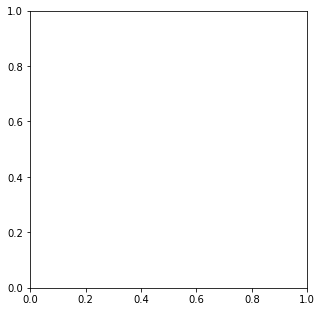

In [42]:
def make_plot(i):
  # Plot and save an image of the double pendulum configuration for time point i
  # Pendulum rods
  ax.plot([0,x1_data1[i],x2_data1[i]],[0,y1_data1[i],y2_data1[i]],lw=2,c='0.8')
  ax.plot([0,x1_data2[i],x2_data2[i]],[0,y1_data2[i],y2_data2[i]],lw=2,c='k')
  # Circles representing the anchor point and the bobs
  c0=Circle((0,0), r/2, fc='k')
  c1=Circle((x1_data1[i],y1_data1[i]), r*m1_num, fc='c', ec='c')
  c2=Circle((x2_data1[i],y2_data1[i]), r*m2_num, fc='m', ec='m')
  c3=Circle((x1_data2[i],y1_data2[i]), r*m1_num, fc='b', ec='b')
  c4=Circle((x2_data2[i],y2_data2[i]), r*m2_num, fc='r', ec='r')
  ax.add_patch(c0)
  ax.add_patch(c1)
  ax.add_patch(c2)
  ax.add_patch(c3)
  ax.add_patch(c4)
  # The trail is divided into ns segments and plotted as a fading line
  ns=20
  s=max_trail//ns
  for j in range(ns):
    imin=i-(ns-j)*s
    if imin<0:
      continue
    imax=imin+s+1
    # fading
    alpha=(j/ns)**2
    ax.plot(x1_data1[imin:imax],y1_data1[imin:imax],c='c',solid_capstyle='butt',lw=2,alpha=alpha)
    ax.plot(x2_data1[imin:imax],y2_data1[imin:imax],c='m',solid_capstyle='butt',lw=2,alpha=alpha)
    ax.plot(x1_data2[imin:imax],y1_data2[imin:imax],c='b',solid_capstyle='butt',lw=2,alpha=alpha)
    ax.plot(x2_data2[imin:imax],y2_data2[imin:imax],c='r',solid_capstyle='butt',lw=2,alpha=alpha)
  # Set the limits of the plots
  ax.set_xlim(-l1_num-l2_num-3*r,l1_num+l2_num+3*r)
  ax.set_ylim(-l1_num-l2_num-3*r,l1_num+l2_num+3*r)
  ax.set_aspect('equal',adjustable='box')
  plt.xlabel('x[m]')
  plt.ylabel('y[m]')
  plt.savefig('_img{:04d}.png'.format(i//di), dpi=72)
  plt.cla()


#Make an image every di time points, corresponding to a grame rate of fps frames per second
fps=10
di=int(1/fps/dt)
fig=plt.figure(figsize=(5,5), dpi=72)
ax=fig.add_subplot(111)

for i in range(0,time.size,di):
  make_plot(i)

In [46]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.10.23+dfsg-2.1ubuntu11.7).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [44]:
i="*.png"
o="animation.gif"
subprocess.call("convert -delay 10 -loop 0 " + i + " " + o, shell=True)

0

In [45]:
fname='animation.gif'
Image(open(fname,'rb').read())

Output hidden; open in https://colab.research.google.com to view.

Resulting animation

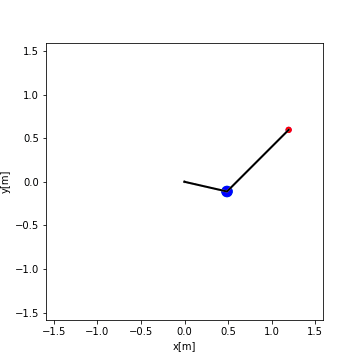